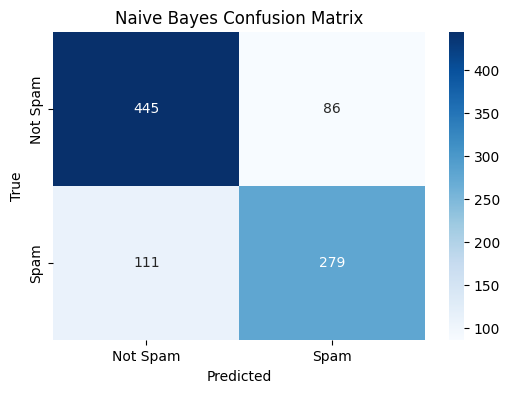


Naive Bayes Metrics:
Accuracy: 0.7861020629750272
Precision: 0.7643835616438356
Recall: 0.7153846153846154
F1-Score: 0.7390728476821192


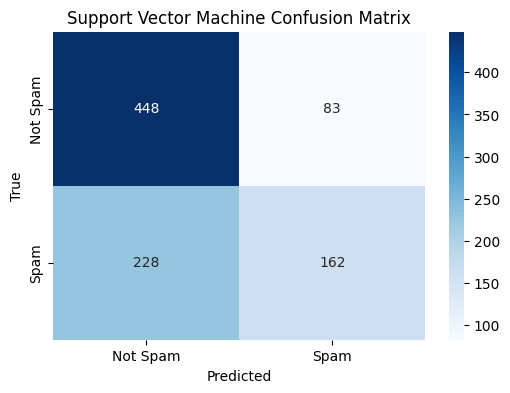


Support Vector Machine Metrics:
Accuracy: 0.6623235613463626
Precision: 0.6612244897959184
Recall: 0.4153846153846154
F1-Score: 0.510236220472441


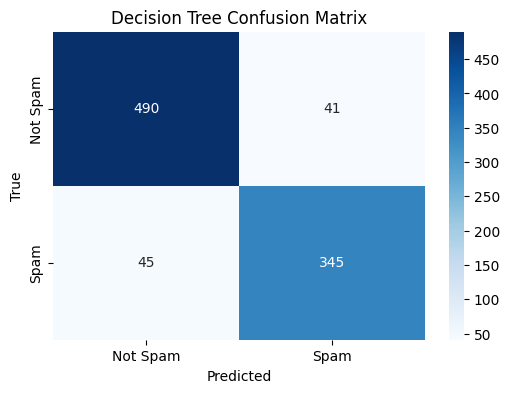


Decision Tree Metrics:
Accuracy: 0.9066232356134636
Precision: 0.8937823834196891
Recall: 0.8846153846153846
F1-Score: 0.8891752577319587


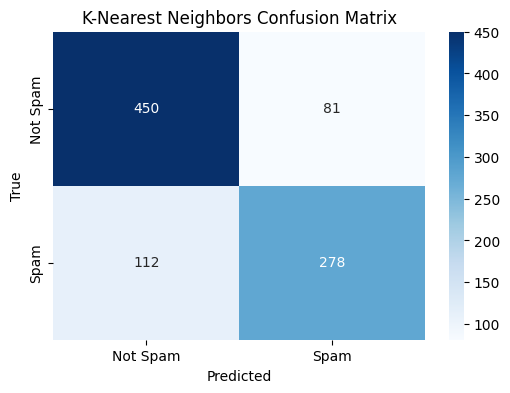


K-Nearest Neighbors Metrics:
Accuracy: 0.7904451682953312
Precision: 0.7743732590529248
Recall: 0.7128205128205128
F1-Score: 0.7423230974632844


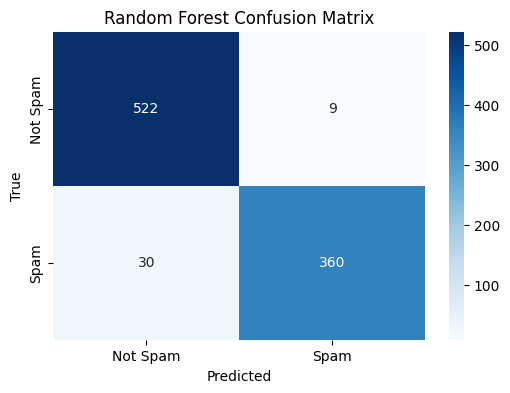


Random Forest Metrics:
Accuracy: 0.9576547231270358
Precision: 0.975609756097561
Recall: 0.9230769230769231
F1-Score: 0.9486166007905139

All Tests Passed


In [2]:
'''
NOT PART OF FINAL PROJECT 
Credit: Thriz Tar
Kaggle dataset notebook (spambase)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the CSV assuming you've uploaded and have a Spambase CSV file
data = pd.read_csv('spambase.csv')
data.head()

# Split into features (X) and target variable (y)
X = data.drop('spam', axis=1)
y = data['spam']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Results storage
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f"\n{name} Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

print("\nAll Tests Passed")
